In [1]:
ls # just for files in current working directory

 330-students-cilantro.csv   Difference-Between-Mode-and-Median.jpg
'Decision Tree.ipynb'       'min max.png'
'Decision Tree.webp'


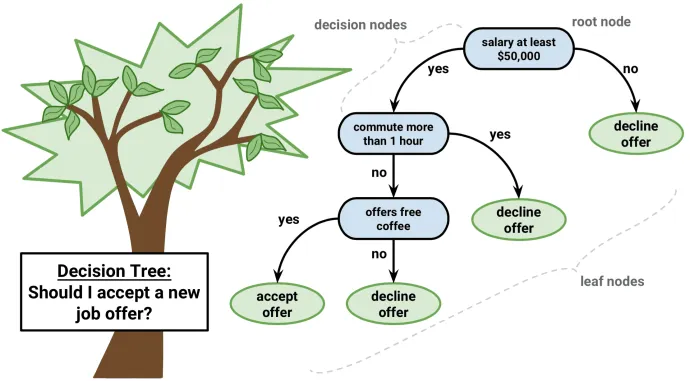

    A decision tree is a type of machine learning model used for classification and regression tasks. It is designed to make decisions by sequentially splitting data into subsets based on specific conditions. The decision-making process resembles a tree structure, with decision nodes representing questions or conditions, branches representing possible outcomes, and leaf nodes representing the final outcome or class.

#### Key Concepts of Decision Trees
* Root Node:<br>
     - The topmost node in the tree, representing the initial question or split. It's typically chosen based on the feature that best separates the data.
* Decision Nodes: <br>
    - Nodes where a decision is made, leading to different branches based on the condition applied at that node. Each decision node has two or more branches.
* Leaf Nodes: <br>
    - These are the endpoints of the tree, representing a final decision or outcome. In classification, it would be a class label; in regression, it would be a numerical value.
* Splitting Criteria: <br>
    - The condition or question used to split the data at each decision node. Common criteria include Gini impurity, entropy, and information gain for classification, and mean squared error for regression.
* Axis-Parallel Hyperplanes:<br>
    - Decision trees create splits by using axis-parallel hyperplanes, which means each split is aligned with one of the data axes (features). This results in rectangular regions (hypercubes) in the data space.
* Nested If-Else Logic:<br>
    - The tree structure can be represented as a series of nested if-else statements. Each decision node represents a conditional check, and the branches represent the outcomes of those conditions.
##### Building a Decision Tree
* Data Splitting:<br>
    - A decision tree recursively splits the data based on a chosen splitting criterion. The goal is to maximize the purity of the resulting subsets (for classification) or minimize the variance within subsets (for regression).
* Stopping Criteria:<br>
    - The tree-building process continues until a stopping criterion is met, such as reaching a maximum depth, having a minimum number of samples in a node, or achieving a predefined level of purity.
* Tree Depth and Complexity:<br>
    - The depth of the tree represents the number of levels of decisions. Deeper trees can represent more complex decision boundaries but are more prone to overfitting.
Advantages and Disadvantages
##### Advantages:
* Easy to understand and interpret.
* Can handle both categorical and numerical data.
* Requires little data preprocessing.
* Can model non-linear relationships.
* Works well with large datasets.
##### Disadvantages:
* Prone to overfitting, especially with deep trees.
* Sensitive to noisy data and outliers.
* May not generalize well with small datasets.
* Does not inherently support multi-class classification without extensions.
##### Applications
    Decision trees are widely used in various applications, including finance, healthcare, marketing, and more. They form the basis for more complex ensemble methods like Random Forests and Gradient Boosting Machines, which aim to improve the performance and stability of single decision trees.



### Learning objectives
* Explain how a decision tree classifier makes predictions
* Interpret a diagram of a decision tree
* Interpret a decision boundary plot for datasets with 2 numeric features (like the cilantro dataset)
* Appropriately use `fit`,`predict`, and `score` in `scikit-learn`
* Explain the `max_depth` hyperparameter of `DecisionTreeClasifier`
* Explain the scenario in which a `DecisionTreeClassifier` with `max_depth=None` would not get 100% training accuracy
* Distinguish between parameters and hyperparameters.

### Cilantro Dataset

In [23]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.rcParams['font.size'] = 16

from sklearn.tree import DecisionTreeClassifier
from sklearn.dummy import DummyClassifier

#from plot_classifier import plot_classifier

In [24]:
import re
import graphviz
from sklearn.tree import export_graphviz

def display_tree(feature_names, tree):
    """ For binary classification only """
    dot = export_graphviz(tree, out_file=None, feature_names=feature_names, class_names=tree.classes_.astype(str), impurity=False)
    # adapted from https://stackoverflow.com/questions/44821349/python-graphviz-remove-legend-on-nodes-of-decisiontreeclassifier
    dot = re.sub('(\\\\nsamples = [0-9]+)(\\\\nvalue = \[[0-9]+, [0-9]+\])(\\\\nclass = [A-Za-z0-9]+)', '', dot)
    dot = re.sub(     '(samples = [0-9]+)(\\\\nvalue = \[[0-9]+, [0-9]+\])\\\\n', '', dot)
    return graphviz.Source(dot)

In [25]:
data = pd.read_csv("330-students-cilantro.csv")

In [26]:
data.head()

,What percentage of days do you typically eat meat or fish?,What percentage grade do you expect to get in this course?,Do you like cilantro?
0,42.0,90,Yes
1,85.0,83,No
2,28.0,83,Yes
3,100.0,80,No
4,100.0,75,No


In [27]:
data.columns = ["meat", "grade", "cilantro"] # Just renaming columns

In [28]:
data.head(5) # First five vlaues

,meat,grade,cilantro
0,42.0,90,Yes
1,85.0,83,No
2,28.0,83,Yes
3,100.0,80,No
4,100.0,75,No


In [29]:
data.tail(5) # last 5

,meat,grade,cilantro
195,100.0,85,Yes
196,71.0,80,Yes
197,100.0,90,Yes
198,0.0,90,Yes
199,42.0,90,Yes


In [30]:
data.sample(5) # 5 Sample values 

,meat,grade,cilantro
95,95.0,85,Yes
49,100.0,80,Yes
106,100.0,80,No
111,71.0,90,No
183,100.0,70,No


In [33]:
data.duplicated().sum() # showing duplicates

88

In [34]:
data.isnull().sum()

meat        0
grade       0
cilantro    0
dtype: int64

In [35]:
row, columns = data.shape
print("Total no. of Rows: {} ::: Total no. of Columns: {}".format(row, columns))

Total no. of Rows: 200 ::: Total no. of Columns: 3


In [36]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   meat      200 non-null    float64
 1   grade     200 non-null    int64  
 2   cilantro  200 non-null    object 
dtypes: float64(1), int64(1), object(1)
memory usage: 4.8+ KB


In [37]:
data.describe()

,meat,grade
count,200.000000,200.000000
mean,72.812850,83.440000
std,31.605226,8.633603
min,0.000000,4.000000
25%,50.000000,80.000000
50%,86.000000,85.000000
75%,100.000000,90.000000
max,100.000000,100.000000


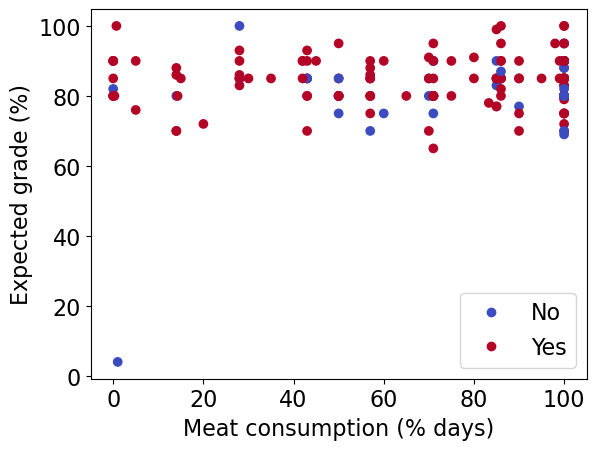

In [38]:
scatter = plt.scatter(data["meat"], data["grade"], c=data["cilantro"]=="Yes", cmap=plt.cm.coolwarm);
plt.xlabel("Meat consumption (% days)");
plt.ylabel("Expected grade (%)");
plt.legend(scatter.legend_elements()[0], ["No", "Yes"]);

In [39]:
data["cilantro"].value_counts() # counting values of "Cilantro"==Yes or No

cilantro
Yes    144
No      56
Name: count, dtype: int64

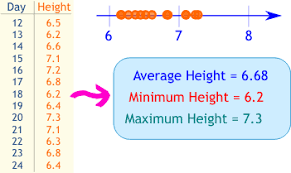

In [40]:
 data["meat"].min() # Minimum value of meat consumpution

0.0

In [41]:
data["meat"].max() # Maximum value of meat consumpution

100.0

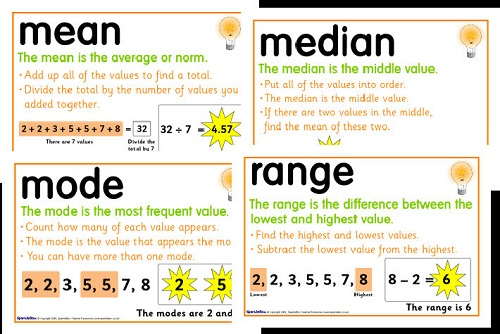

In [42]:
data["meat"].mode()

0    100.0
Name: meat, dtype: float64

In [43]:
data["meat"].median()

86.0

In [44]:
data["meat"].sum() / len(data.meat)

72.81285

In [45]:
data["meat"].mean()

72.81285

In [46]:
range_of_data = data["meat"].max()-data["meat"].min()

In [47]:
range_of_data

100.0

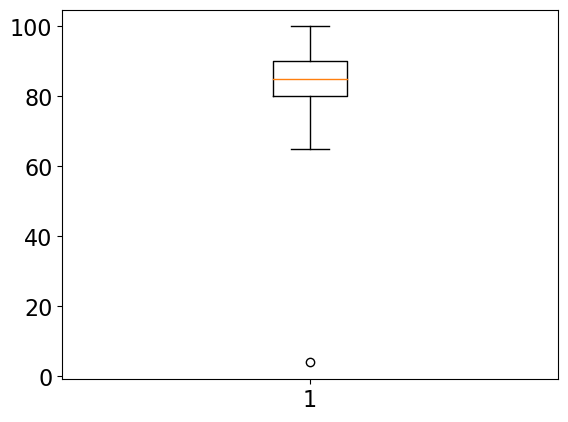

In [48]:
plt.boxplot(data["grade"])
plt.show()

In [49]:
X = data[["meat","grade"]]

In [50]:
X

,meat,grade
0,42.0,90
1,85.0,83
2,28.0,83
3,100.0,80
4,100.0,75
...,...,...
195,100.0,85
196,71.0,80
197,100.0,90
198,0.0,90


In [51]:
y = data["cilantro"]

In [52]:
y.dtypes

dtype('O')

In [53]:
y.head()

0    Yes
1     No
2    Yes
3     No
4     No
Name: cilantro, dtype: object

In [54]:
y.value_counts()

cilantro
Yes    144
No      56
Name: count, dtype: int64

In [55]:
dc = DummyClassifier(strategy="prior") # It predicts more common class

In [56]:
dc.fit(X,y) # Pick data and learning but not very interesting learning

DummyClassifier()

In [57]:
dc.score(X,y)

0.72

In [58]:
y.value_counts()/len(y) # verifc=ication of above

cilantro
Yes    0.72
No     0.28
Name: count, dtype: float64

# Decision Tree
* Our first approach to supervised learning: decision trees.
* Basic idea: ask a bunch of yes/no questions until you end up at a prediction.
* E.g. for our cilantro dataset,
    - If you eat meat <5% of the time, predict "Yes"
    - Otherwise, if you eat meat >95% of the time, predict "No"
    - Otherwise, if you expect to fail the course, predict "No"
    - Otherwise, predict "Yes"
* This "series of questions" approach can be drawn as a tree:
```      
        Eats meat <5% of the time
            /          \
           / True       \  False
          /              \
         Yes           Eats meat >95% of the time
                        /      \
                  True /        \ False
                      /          \ 
                    No         Expects to fail the course (<50%)
                                 /           \
                                / True        \ False
                               /               \
                              No              Yes
```
* The decision tree algorithm automatically learns a tree like this, based on the data set!
    - We would go through how it does this
    - But it's worth noting that it support two types of inputs:
1. Categorical (e.g., Yes/No or more options)
2. Numeric (a number)
In the numeric case, the decision tree algorithm also picks the threshold (e.g. 5%, 50%, etc.)

In our case here, both features are numeric.

Let's apply a decision tree to our cilantro dataset.

In [59]:
tree = DecisionTreeClassifier(max_depth=1)

* Here, we create a DecisionTreeClassifier object from scikit-learn.
* We pass in parameters - these are called **hyperparameters** - in this case `max_depth=1` which means the tree can only have depth 1.
* Next we fit to the data using .fit().
* The semicolon `;` is just cosmetic, otherwise some junk gets printed out.

In [60]:
tree.fit(X,y);

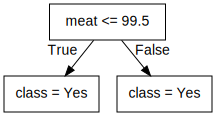

In [61]:
display_tree(data.columns[:-1],tree)

* This is a totally useless decision tree that predicts "Yes" for any feature.
* This happens sometimes. Let's roll with it for the moment.

- This is doing the same thing as DummyClassifier so we get the same score.
* We can verify this using .predict()

In [62]:
X = X.astype(float)  # Convert to floats

In [63]:
tree.score(X,y)

0.72

In [64]:
X.dtypes

meat     float64
grade    float64
dtype: object

In [65]:
tree.predict([[50,50]]) # user input

/home/chattha/anaconda3/lib/python3.11/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


array(['Yes'], dtype=object)

In [66]:
tree.predict([[99,99]])

/home/chattha/anaconda3/lib/python3.11/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


array(['Yes'], dtype=object)

In [67]:
tree.predict([[10,10]])


/home/chattha/anaconda3/lib/python3.11/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


array(['Yes'], dtype=object)

In [68]:
tree.predict(X) # all input from data set

array(['Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes',
       'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes',
       'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes',
       'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes',
       'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes',
       'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes',
       'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes',
       'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes',
       'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes',
       'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes',
       'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes',
       'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes',
       'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes',
       'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes',
       'Yes', 'Yes',

In [69]:
# Show One because of Depth=1

In [70]:
tree = DecisionTreeClassifier(max_depth=2)

In [71]:
tree.fit(X,y)

DecisionTreeClassifier(max_depth=2)

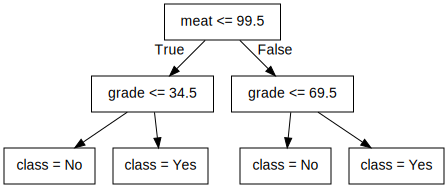

In [72]:
display_tree(data.columns[:-1], tree)

In [73]:
tree.predict(X)

array(['Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes',
       'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes',
       'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes',
       'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes',
       'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes',
       'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes',
       'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes',
       'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes',
       'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes',
       'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes',
       'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes',
       'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes',
       'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes',
       'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes',
       'Yes', 'Yes',

In [74]:
tree= DecisionTreeClassifier(max_depth=30)

In [75]:
tree.fit(X,y)

DecisionTreeClassifier(max_depth=30)

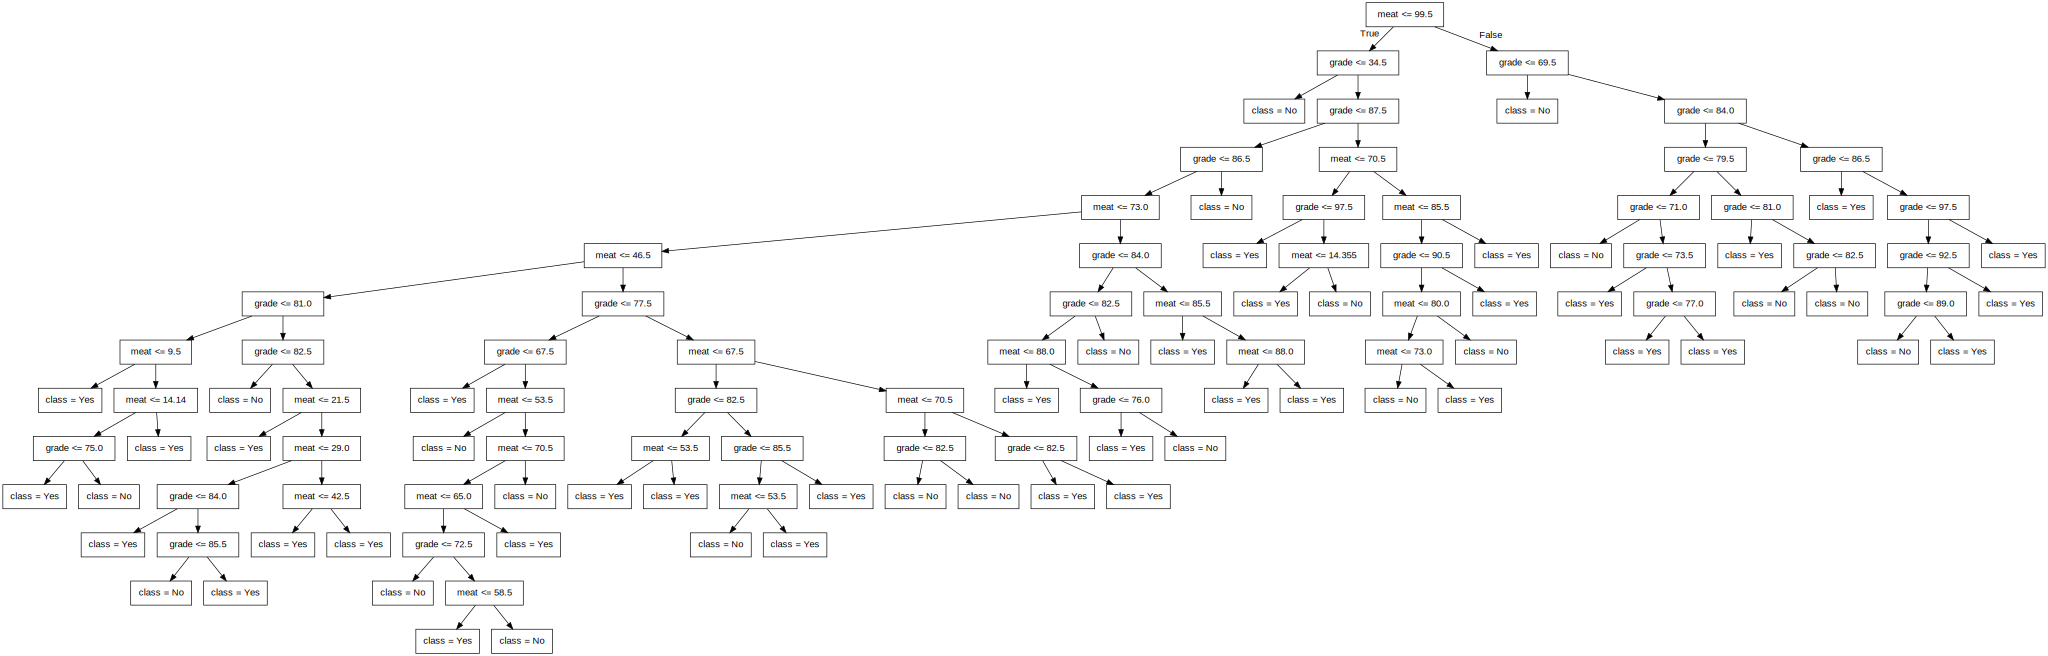

In [76]:
display_tree(data.columns[:-1], tree) # for not last column name

In [77]:
tree.predict(X)

array(['Yes', 'No', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes',
       'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'No',
       'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes',
       'Yes', 'Yes', 'Yes', 'Yes', 'No', 'Yes', 'Yes', 'Yes', 'No', 'No',
       'Yes', 'Yes', 'No', 'Yes', 'No', 'Yes', 'Yes', 'Yes', 'Yes', 'No',
       'Yes', 'Yes', 'Yes', 'No', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes',
       'Yes', 'Yes', 'Yes', 'No', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes',
       'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'No', 'No', 'Yes',
       'Yes', 'No', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes',
       'Yes', 'No', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'No', 'Yes',
       'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes',
       'Yes', 'No', 'Yes', 'Yes', 'Yes', 'Yes', 'No', 'Yes', 'No', 'Yes',
       'Yes', 'No', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes',
       'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'No', 'Yes',
     

In [78]:
# As the Depth increase see changes in Tree structure

In [79]:
tree.score(X, y)

0.805

# Why Not 100 Accuracy??
###### Instances of duplicate features

In [80]:
# If two person have same thing the job is to find They like or not 
# If you have same both features but different labels there's no way the
# Decision tree can get them both right that why giving 80%

In [81]:
# it's OK if you don't understand this line
# Here I'm showing duplicate
data.loc[data.duplicated(subset=data.columns[:-1], keep=False)].sort_values(by=data.columns.values.tolist()).head(20)

,meat,grade,cilantro
19,0.0,80,Yes
62,0.0,80,Yes
100,0.0,80,Yes
143,0.0,90,Yes
170,0.0,90,Yes
198,0.0,90,Yes
69,14.0,70,Yes
130,14.0,70,Yes
31,28.0,85,No
162,28.0,85,No


##### See 162 and 178 same meat same grade and different cilantro

### If we remove duplicate then 100% accuracy

In [82]:
# it's OK if you don't understand this line Actually I'm dropping duplicates here and sorting on base of "Cilantro"
data_nodup = data.sort_values(by="cilantro").drop_duplicates(subset=data.columns[:-1]).reset_index(drop=True)

In [83]:
data_nodup

,meat,grade,cilantro
0,100.0,90,No
1,100.0,83,No
2,70.0,80,No
3,57.0,85,No
4,57.0,70,No
...,...,...,...
90,15.0,85,Yes
91,100.0,72,Yes
92,57.0,75,Yes
93,30.0,85,Yes


In [84]:
data_nodup.shape

(95, 3)

In [85]:
X_nodup = data_nodup.iloc[:,:2]
y_nodup = data_nodup.iloc[:,-1]

In [86]:
tree_nodup = DecisionTreeClassifier() # default is max_depth=None

In [87]:
tree_nodup.fit(X_nodup, y_nodup);

In [88]:
tree_nodup.score(X_nodup, y_nodup) # 100 Accuracy

1.0

##  ML model parameters and hyperparameters

- When you call `fit`, a bunch of values get set, like the split variables and split thresholds. 
- These are called **parameters**.
- But even before calling `fit` on a specific data set, we can set some "knobs" that control the learning, e.g. `max_depth`.
- These are called **hyperparameters**.

In scikit-learn, hyperparameters are set in the constructor:

##### Run what you can do in Decision Tree Classifer

In [89]:
?DecisionTreeClassifier 

In [90]:
tree = DecisionTreeClassifier(max_depth=3) 
tree.fit(X, y);

Here, `max_depth` is a hyperparameter. There are many, many more! See [here](https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html).



To summarize:

- **parameters** are automatically learned by the algorithm during training (`fit`)
- **hyperparameters** are specified by the human, before `fit`, based on:
    - expert knowledge
    - heuristics, or 
    - systematic/automated optimization (more on that later on)

Important question: how does accuracy change vs. max_depth?

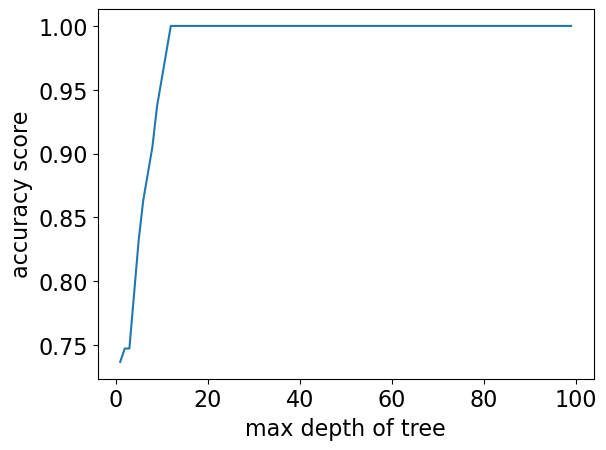

In [91]:
# it would be good to understand this code, but not that urgent
# I am using a list comprehension but you might find it easier to understand with a `for` loop - post on Piazza for more info
max_depths = np.arange(1, 100)
scores = [DecisionTreeClassifier(max_depth=max_depth).fit(X_nodup, y_nodup).score(X_nodup, y_nodup) for max_depth in max_depths]
plt.plot(max_depths, scores);
plt.xlabel("max depth of tree");
plt.ylabel("accuracy score");

- Why not just use a very deep decision tree for every supervised learning problem and get super high accuracy?
- Well, the goal of supervised learning is to predict unseen/new data...
  - The above decision tree has 100% accuracy on the training data **where we already know the answer**.
  - It perfectly labels the data we used to make the tree...
  - But we want to know how our model performs on data not used in training.
  - We will split our original dataset into two parts, one for "training" and one for "testing".

In [92]:
from sklearn.model_selection import train_test_split

In [93]:
df_train, df_test = train_test_split(df_nodup)

NameError: name 'df_nodup' is not defined

In [94]:
scatter = plt.scatter(df_train["meat"], df_train["grade"], c=df_train["cilantro"]=="Yes", cmap=plt.cm.coolwarm);
plt.xlabel("Meat consumption (% days)");
plt.ylabel("Expected grade (%)");
plt.legend(scatter.legend_elements()[0], ["No", "Yes"]);

NameError: name 'df_train' is not defined

In [95]:
scatter = plt.scatter(df_test["meat"], df_test["grade"], c=df_test["cilantro"]=="Yes", cmap=plt.cm.coolwarm);
plt.xlabel("Meat consumption (% days)");
plt.ylabel("Expected grade (%)");
plt.xlim((0,100));
plt.ylim((0,100));
plt.legend(scatter.legend_elements()[0], ["No", "Yes"]);

NameError: name 'df_test' is not defined

## Summary

- Cilantro dataset: predict whether a CPSC 330 student likes cilantro (yes/no) from their meat consumption and expected grade (numeric features)
- Decision trees: a classifier that makes predictions by sequentially looking at features and checking whether they are above/below a threshold
- Decision trees learn axis-aligned decision boundaries (vertical and horizontal lines with 2 features)
- `fit(X,y)`: train classifier from training data
- `predict(X)`: make one or more predictions given a trained classifier
- `score(X,y)`: makes predictions with `predict()` and compares them to the true answers passed in as `y`
- Classifiers have hyperparameters, which are set before calling `fit`
  - Often set by humans, but not always (see later lecture)
- `max_depth` is a hyperparameter of `DecisionTreeClassifier` that controls the maximum depth of the learned tree  
- larger `max_depth` -> larger accuracy on training data
- `DecisionTreeClassifier` with `max_depth=None` not getting 100% training accuracy when two students have the same features but different target values

  # ------------------------------End Of Lecture------------------------------